In [433]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns

In [434]:
df = pd.read_csv("penguins.csv")
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


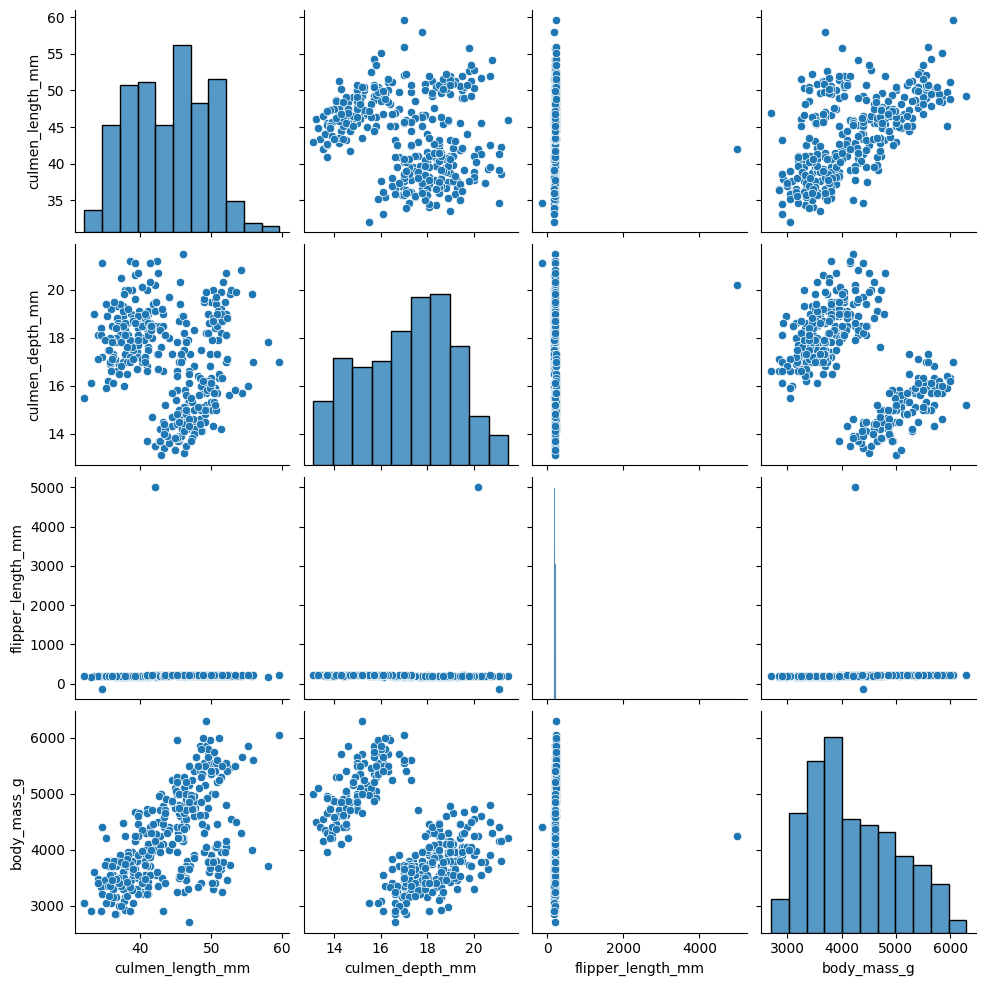

In [435]:
sns.pairplot(df)

# Show the plot
plt.show()

In [436]:
df.isnull().sum().sum()

17

In [437]:
df.dropna(inplace=True)
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [438]:
df['gender'] = df['sex'].map({'FEMALE': 1, 'MALE': 0})
df=df.drop(columns='sex',axis=1)
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,39.1,18.7,181.0,3750.0,0.0
1,39.5,17.4,186.0,3800.0,1.0
2,40.3,18.0,195.0,3250.0,1.0
4,36.7,19.3,193.0,3450.0,1.0
5,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1.0
340,46.8,14.3,215.0,4850.0,1.0
341,50.4,15.7,222.0,5750.0,0.0
342,45.2,14.8,212.0,5200.0,1.0


In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   gender             334 non-null    float64
dtypes: float64(5)
memory usage: 15.7 KB


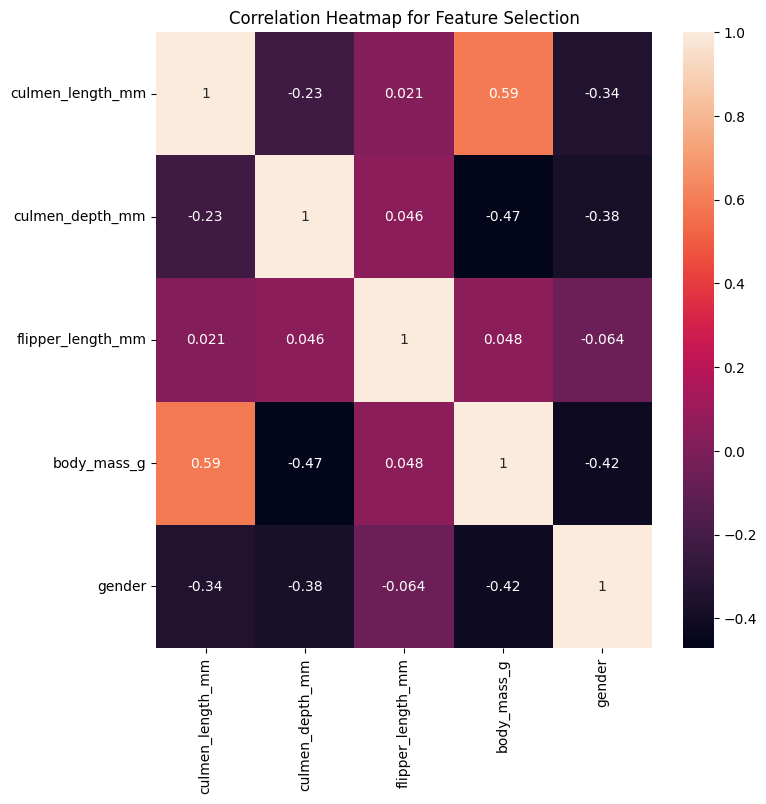

In [440]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap for Feature Selection')
plt.show()

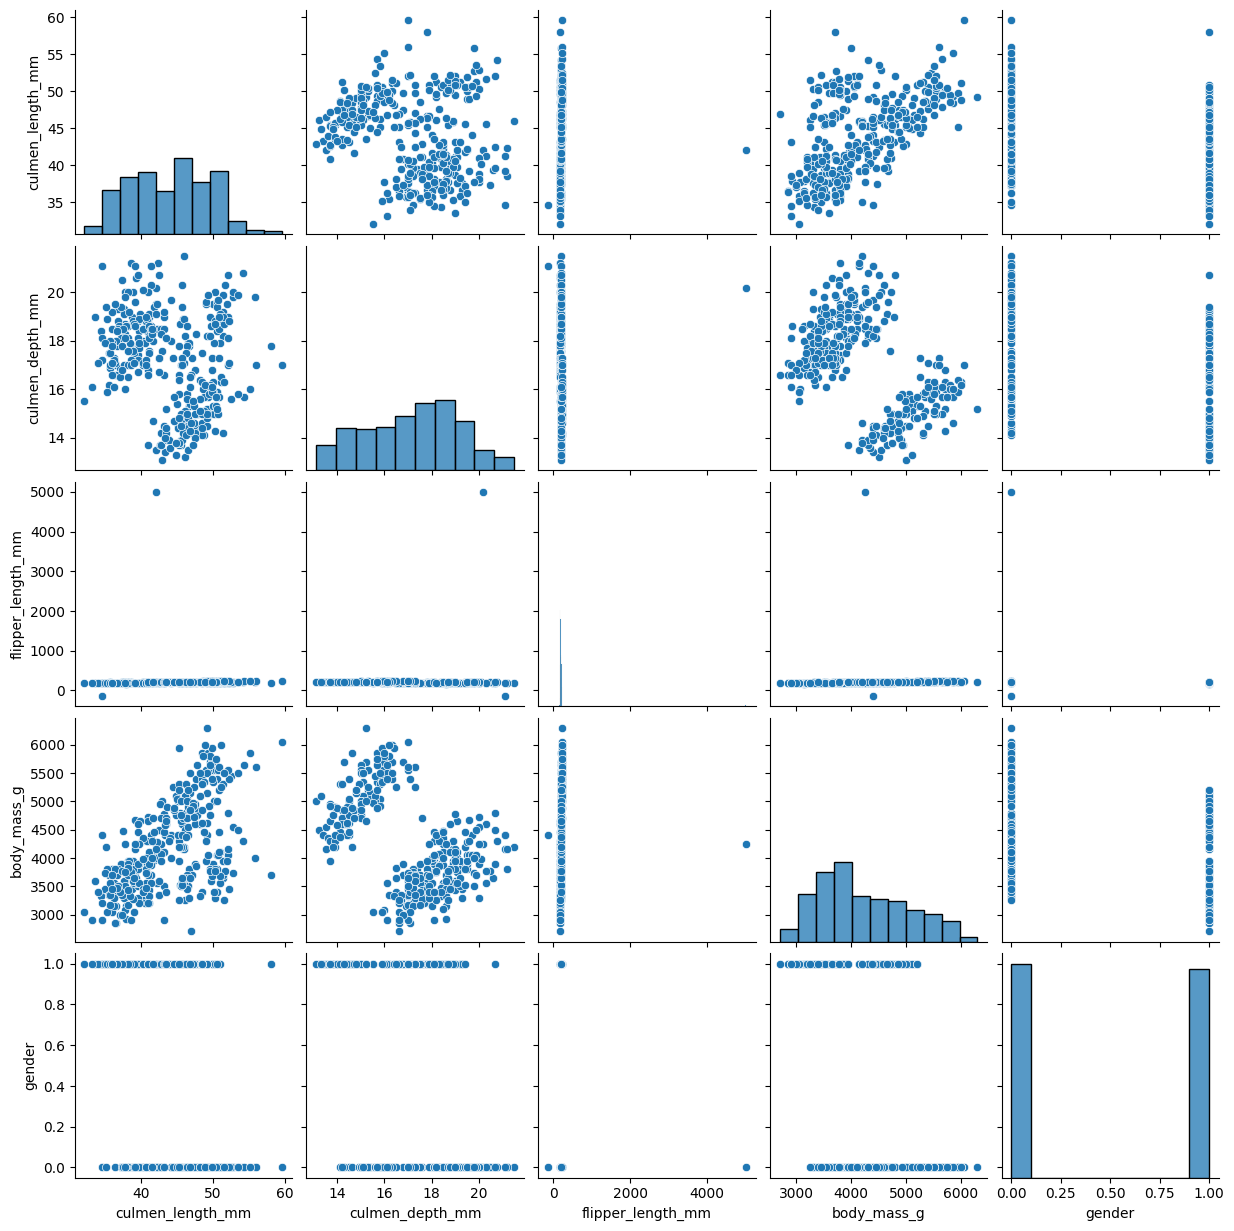

In [441]:
sns.pairplot(df)

# Show the plot
plt.show()

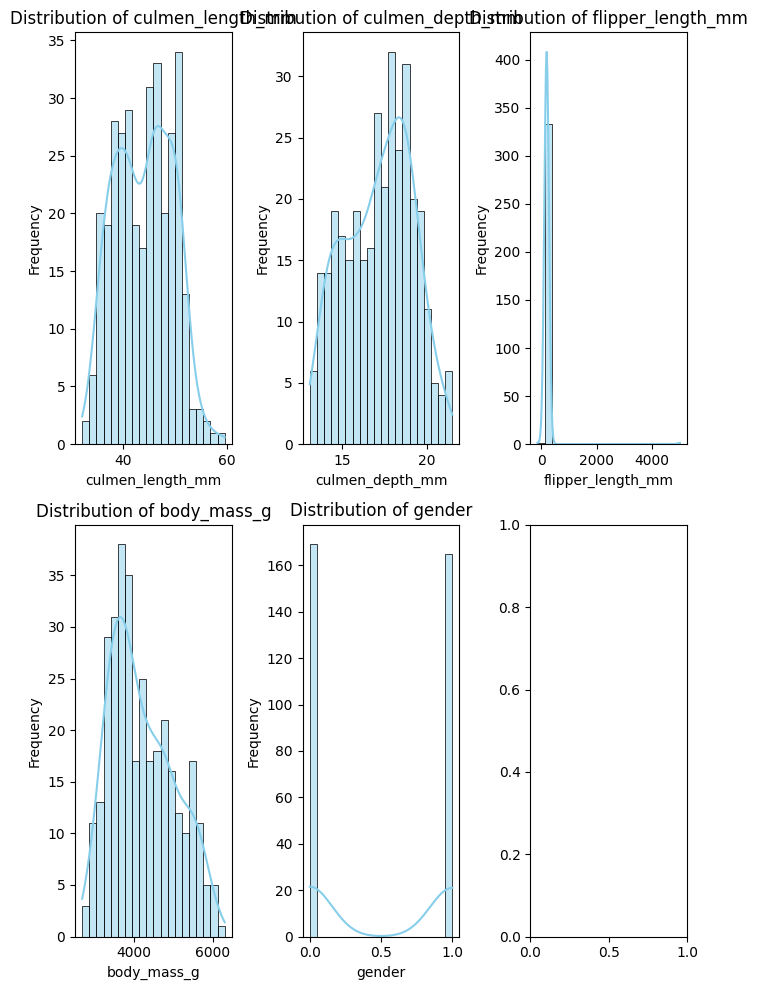

In [442]:

num_columns = len(df.columns)
num_rows = (num_columns // 3) + (1 if num_columns % 3 != 0 else 0)

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(7, num_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each column and plot the histogram
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i], color='skyblue', bins=20)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


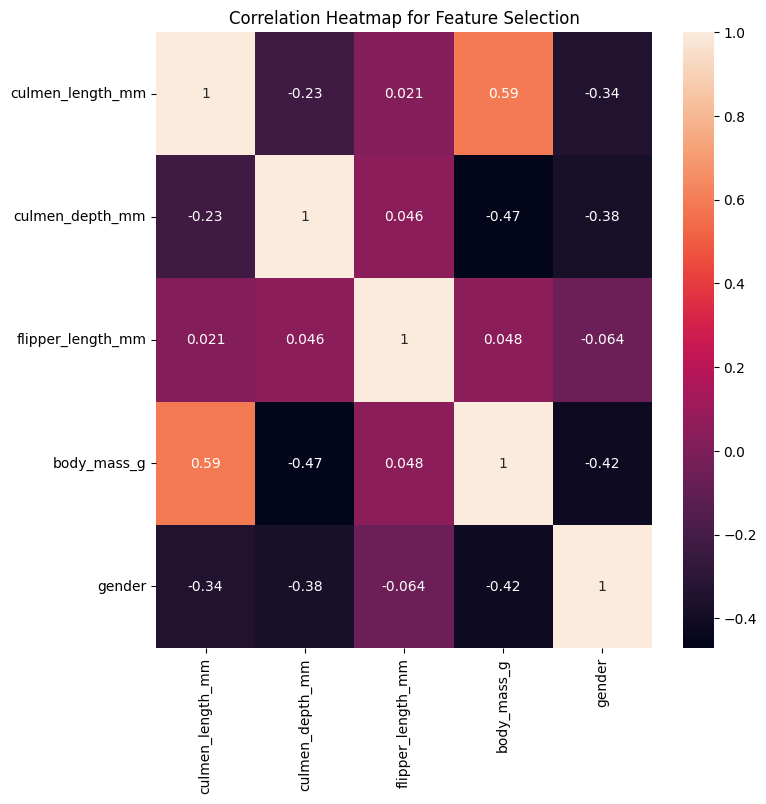

In [443]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap for Feature Selection')
plt.show()

In [444]:
X=df
X.isnull().sum().sum()

1

In [445]:
X.dropna(inplace=True)

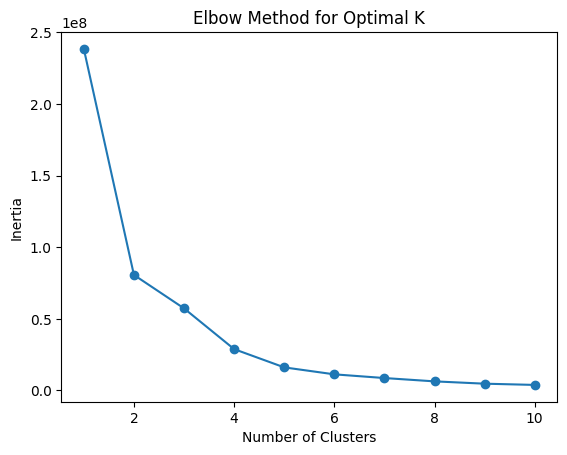

In [446]:
inertia = []
for k in range(1, 11):  # Testing from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), inertia,marker="o")
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [447]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Assign the cluster labels to the original data
df['cluster'] = kmeans.labels_

# Evaluate the clustering with Silhouette Score
sil_score_without_st = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {sil_score_without_st}')

Silhouette Score: 0.6211064946061452


In [448]:
df['cluster'].value_counts()

cluster
0    204
1    130
Name: count, dtype: int64

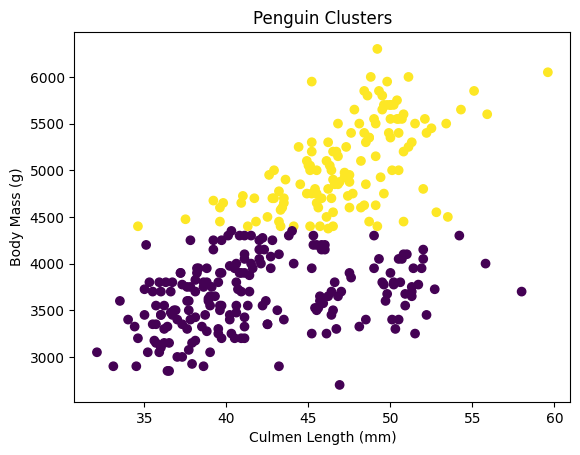

In [449]:
plt.scatter(df['culmen_length_mm'], df['body_mass_g'], c=df['cluster'], cmap='viridis')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Penguin Clusters')
plt.show()

In [450]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [451]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Assign the cluster labels to the original data
df['cluster'] = kmeans.labels_

# Evaluate the clustering with Silhouette Score
sil_score_with_st = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {sil_score_with_st}')

Silhouette Score: 0.4383193343309456


Silhouette Score after PCA: 0.43831933433094566


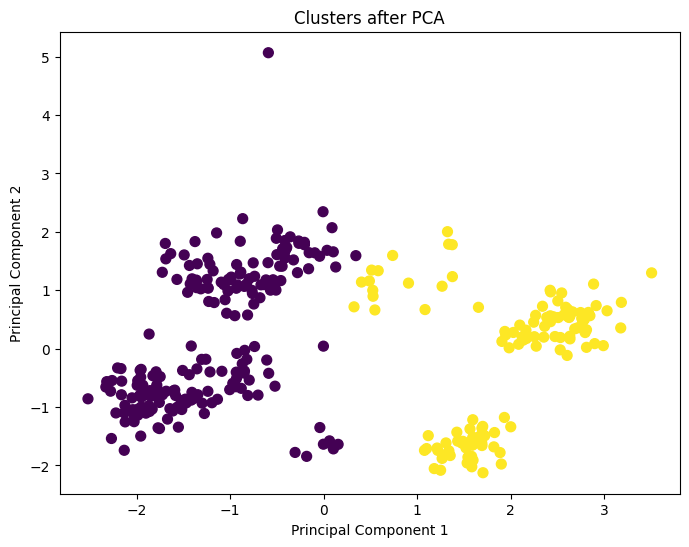

In [452]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)  # You can change n_components to any number of dimensions you want
X_pca = pca.fit_transform(X_scaled)

# Step 3: Apply clustering (e.g., KMeans) on the PCA-transformed data
kmeans = KMeans(n_clusters=2, random_state=42)  # Choose your desired number of clusters
kmeans.fit(X_pca)

# Step 4: Calculate Silhouette Score to evaluate clustering
sil_score_with_pca = silhouette_score(X_pca, kmeans.labels_)
print(f"Silhouette Score after PCA: {sil_score_with_pca}")

# Step 5: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title("Clusters after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [453]:
cluster_labels = {0: 'Adelie', 1: 'Chinstrap'}

df['species'] = df['cluster'].map(cluster_labels)
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,cluster,species
0,39.1,18.7,181.0,3750.0,0.0,0,Adelie
1,39.5,17.4,186.0,3800.0,1.0,0,Adelie
2,40.3,18.0,195.0,3250.0,1.0,0,Adelie
4,36.7,19.3,193.0,3450.0,1.0,0,Adelie
5,39.3,20.6,190.0,3650.0,0.0,0,Adelie
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1.0,1,Chinstrap
340,46.8,14.3,215.0,4850.0,1.0,1,Chinstrap
341,50.4,15.7,222.0,5750.0,0.0,1,Chinstrap
342,45.2,14.8,212.0,5200.0,1.0,1,Chinstrap


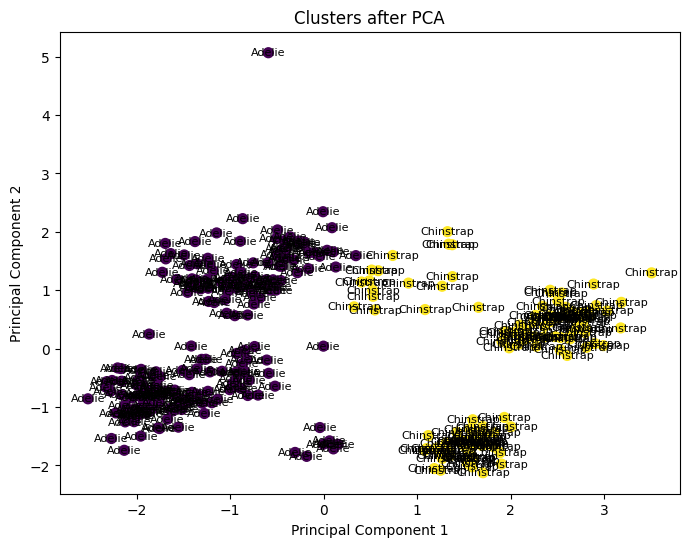

In [454]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
for i in range(len(X_pca)):
    species_label = df['species'].iloc[i]
    plt.text(X_pca[i, 0], X_pca[i, 1], species_label, fontsize=8, color='black', ha='center', va='center')
plt.title("Clusters after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()


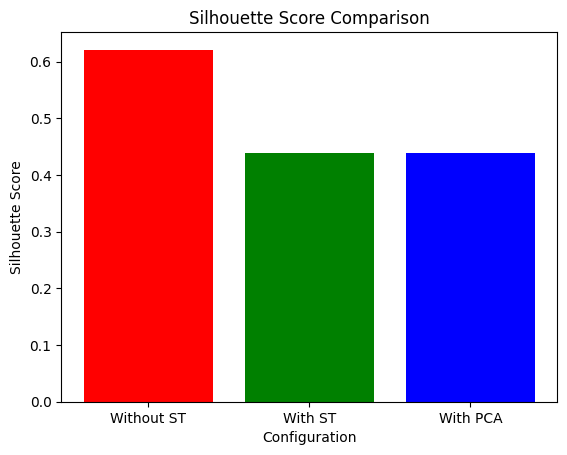

In [455]:
import matplotlib.pyplot as plt

# Silhouette scores for different models/configurations
scores = [sil_score_without_st, sil_score_with_st,sil_score_with_pca]
labels = ['Without ST', 'With ST','With PCA']

# Plotting the comparison
plt.bar(labels, scores, color=['red', 'green','blue'])
plt.title('Silhouette Score Comparison')
plt.xlabel('Configuration')
plt.ylabel('Silhouette Score')
plt.show()


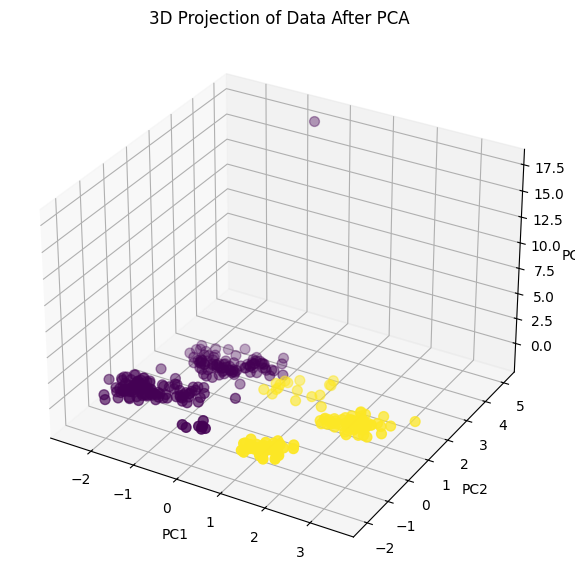

In [456]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['cluster'], cmap='viridis', s=50)

# Labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Projection of Data After PCA')

plt.show()


In [ ]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample Data - You should replace this with your actual data
# Let's assume X_scaled is the scaled data used to train the model
X = np.array([[39.1, 18.7, 181.0, 3750.0], [39.5, 17.4, 186.0, 3800.0], [40.3, 18.0, 195.0, 3250.0]])  # Example
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the KMeans model (This should be done beforehand)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Set up the GUI
root = tk.Tk()
root.title("Penguin Species Prediction")

# Create input labels and entry fields
tk.Label(root, text="Culmen Length (mm):").grid(row=0, column=0)
tk.Label(root, text="Culmen Depth (mm):").grid(row=1, column=0)
tk.Label(root, text="Flipper Length (mm):").grid(row=2, column=0)
tk.Label(root, text="Body Mass (g):").grid(row=3, column=0)

culmen_length_entry = tk.Entry(root)
culmen_depth_entry = tk.Entry(root)
flipper_length_entry = tk.Entry(root)
body_mass_entry = tk.Entry(root)

culmen_length_entry.grid(row=0, column=1)
culmen_depth_entry.grid(row=1, column=1)
flipper_length_entry.grid(row=2, column=1)
body_mass_entry.grid(row=3, column=1)

# Function to predict the species
def predict_species():
    try:
        # Get input values
        culmen_length = culmen_length_entry.get().strip()
        culmen_depth = culmen_depth_entry.get().strip()
        flipper_length = flipper_length_entry.get().strip()
        body_mass = body_mass_entry.get().strip()

        # Debugging print to check input values
        print(f"Input Values - Culmen Length: {culmen_length}, Culmen Depth: {culmen_depth}, Flipper Length: {flipper_length}, Body Mass: {body_mass}")

        # Check if any field is empty
        if not (culmen_length and culmen_depth and flipper_length and body_mass):
            messagebox.showerror("Invalid Input", "All fields must be filled.")
            return

        # Convert inputs to float and handle invalid numeric input
        culmen_length = float(culmen_length)
        culmen_depth = float(culmen_depth)
        flipper_length = float(flipper_length)
        body_mass = float(body_mass)

        # Debugging print to check if values are correctly converted
        print(f"Converted Values - Culmen Length: {culmen_length}, Culmen Depth: {culmen_depth}, Flipper Length: {flipper_length}, Body Mass: {body_mass}")

        # Create a new data point
        input_data = np.array([[culmen_length, culmen_depth, flipper_length, body_mass]])

        # Scale the input data using the same scaler
        input_data_scaled = scaler.transform(input_data)

        # Predict the cluster (without applying PCA)
        cluster = kmeans.predict(input_data_scaled)

        # Map the cluster to species (example: cluster 0 -> Adelie, cluster 1 -> Chinstrap)
        species = "Adelie" if cluster == 0 else "Chinstrap"

        # Display the predicted species
        messagebox.showinfo("Prediction", f"The predicted species is: {species}")
    
    except ValueError as e:
        messagebox.showerror("Invalid Input", f"Error: {e}. Please enter valid numeric values for all fields.")

# Create the prediction button
predict_button = tk.Button(root, text="Predict Species", command=predict_species)
predict_button.grid(row=4, column=0, columnspan=2)

# Start the GUI loop
root.mainloop()


Input Values - Culmen Length: 39.1, Culmen Depth: 18.7, Flipper Length: 181.0, Body Mass: 3750.0
Converted Values - Culmen Length: 39.1, Culmen Depth: 18.7, Flipper Length: 181.0, Body Mass: 3750.0
Input Values - Culmen Length: 47.2, Culmen Depth: 13.7, Flipper Length: 214.0, Body Mass: 4925.0
Converted Values - Culmen Length: 47.2, Culmen Depth: 13.7, Flipper Length: 214.0, Body Mass: 4925.0


KeyboardInterrupt: 

: 